In [1]:
from tools import *
from figure_2D import *
from figure_3D import *
from images import *

In [2]:
import sys
sys.path.append('..')
import umbrella_mesh
import linkage_vis
import load_jsondata
from configuration import *
from visualization_helper import *

### **Mesh Path**

In [3]:
data_folder_path = './../../data/'
igloo_coars_path = './igloo_rum.json.gz' # 44
igloo_path = data_folder_path+'igloo.json.gz' # 57
squid_path = data_folder_path+'squidward_highres.json.gz' # 143
saddle_path = data_folder_path+'saddle_5t.json.gz' # 31
peanut_path = data_folder_path+'peanut_fp_low.json.gz' # 63


input_path = igloo_path

io, input_data, target_mesh, curr_um, plate_thickness_scaled, target_height_multiplier = parse_input(input_path, handleBoundary = False, isHex = False, use_target_surface = False)
# if `use_target_surface=True`, no need to activate any units

### **Deployed** and **Undeployed**

In [4]:
deployed_cells  = [1, 30] # list(range(32)) # [8]# 
undeployed_cells  = []

# undeployed_cells   = [26,27,28,29,30,31,32,33,34] # mid_top_hline
# undeployed_cells = [19,20,21,22,23,24,25] # mid_hline
# # undeployed_cells = [35,36,37,38,39,40,41,41,42,43] # top_hline
# # undeployed_cells = [26,27,28,29,30,31,32,33,34]+[19,20,21,22,23,24,25] + [35,36,37,38,39,40,41,41,42,43]
# deployed_cells   = [0,1,2,3,4] + [5,6,7,8,9,10,11] + [12,13,14,15,16,17,18]

---

In [5]:
active_cells    = deployed_cells + undeployed_cells
target_percents = [100]*len(deployed_cells) + [0]*len(undeployed_cells) # 0:undeployed | 100:deployed

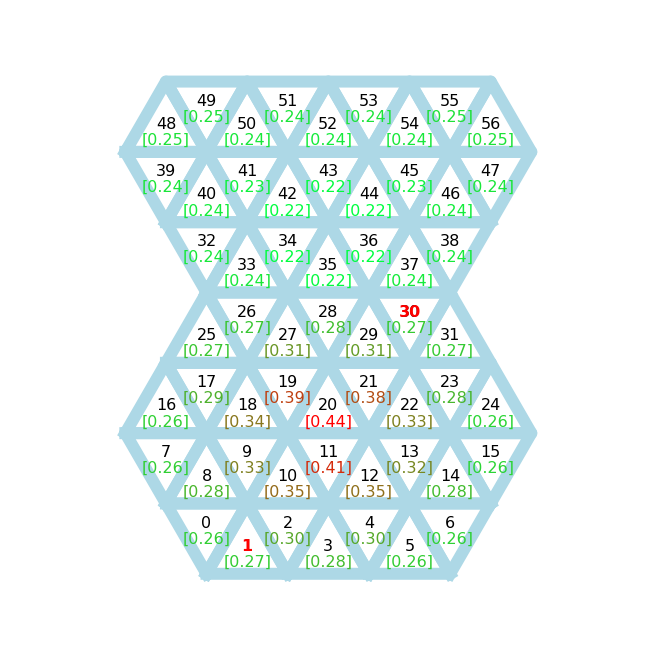

In [6]:
plot_undeployed_2D(input_data,
                   curr_um,
                   show_height=True,
                   active_cells=active_cells,
                   target_percents=target_percents,
                   file_name = '',
                   show_plot=True)

In [7]:
view3D = plot3D(curr_um, input_data)
view3D.show()

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(PointLight(color='#999999', position=(0…

In [8]:
rod_colors = get_color_field(curr_um, input_data, uidBased = False)

In [9]:
init_center_pos = get_center_position(curr_um)
init_heights = curr_um.umbrellaHeights

In [10]:
dep_weights              = set_actives_dep_weights(curr_um.numUmbrellas(), active_cells)
target_heights           = percent_to_height(init_heights, plate_thickness_scaled, active_cells, target_percents)
target_height_multiplier = set_target_height(curr_um.numUmbrellas(), active_cells, target_heights)

In [11]:
success, eqays = deploy_umbrella_pin_rigid_motion(curr_um, plate_thickness_scaled, target_height_multiplier, view3D, rod_colors, analysis = True, dep_weights=dep_weights)

In [12]:
# success, eqays = deploy_umbrella_pin_rigid_motion(curr_um, plate_thickness_scaled, target_height_multiplier, view3D, rod_colors, analysis = True, dep_weights=[0])

In [13]:
# eqays.plot()
curr_um.energy(), curr_um.energyElastic()
# all activated: (3.724431783391101e-05, 3.724431783391103e-05)

(-1.9999715090415606, 2.8444010474301643e-05)

In [14]:
stress_type = 'VonMises'
sview_vm = plot3D_stress(curr_um, stress_type)
sview_vm.show()

VonMises Stresses Extrem values:
    max : 4.94e+01
    min : 0.00e+00


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(PointLight(color='#999999', position=(0…

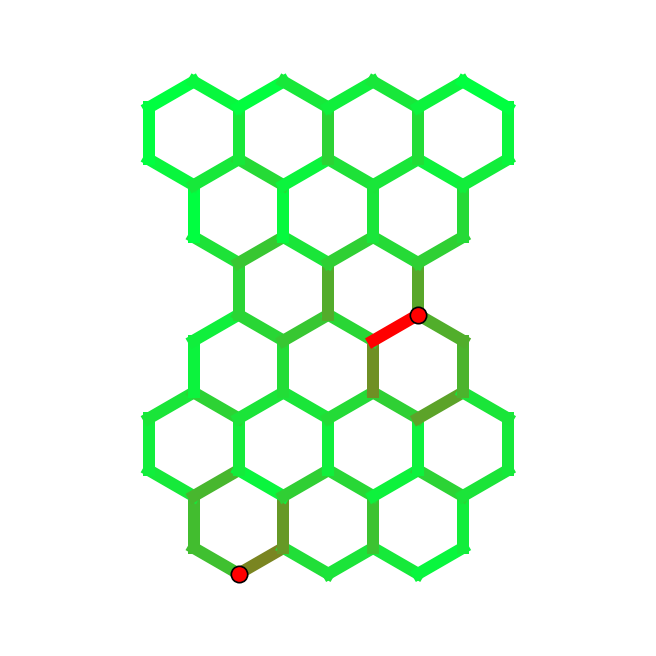

In [15]:
plot2D_stress(curr_um, input_data['umbrella_connectivity'], init_center_pos, active_cells, target_percents, stress_type=stress_type, show_percent=False)